In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_name = 'airbnb.csv'
df_air = pd.read_csv(file_name)

In [146]:
#1. Dataframe: listing each room_id, host_id with total score in two sorting ways 

df_air1 = df_air.copy()

df_air1[['overall_satisfaction', 'reviews']]

df_air1 = df_air1.fillna(0)

df_air1['total_score'] = df_air1['overall_satisfaction'] + df_air1['reviews']* 0.378

result1 = pd.pivot_table(df_air1, index=['room_id', 'host_id'], values=['total_score'])

result1 = result1.sort_values(by='total_score', axis=0)

result1.to_csv("sorted_total_score_ascend.csv",mode='w')

result1 = result1.sort_values(by='total_score', axis=0, ascending=False)

result1.to_csv("sorted_total_score_descend.csv",mode='w')



In [161]:
# 2. Dataframe: listing average of factors by grouped neighborhood 
df_air2 = df_air.copy()

# make empty dataframe

result2 = pd.DataFrame()

# grouping

neighbors = df_air2.groupby('neighborhood')

# avg of reviews 

avgOfReviews = neighbors['reviews'].mean()

result2['avg of reviews'] = avgOfReviews

# avg of overall_satisfaction

avgOfOverAllSatisfaction = neighbors['overall_satisfaction'].mean()

result2['avg of overall_satisfaction'] = avgOfOverAllSatisfaction

# avg of price

avgOfPrice = neighbors['price'].mean()

result2['avg of price'] = avgOfPrice

# max of reviews

maxOfReviews = neighbors['reviews'].max()

result2['max of reviews'] = maxOfReviews
# min of reviews

minOfReviews = neighbors['reviews'].min()

result2['min of reviews'] = minOfReviews

# max of price

maxOfPrice = neighbors['price'].max()

result2['max of price'] = maxOfPrice

# min of price

minOfPrice = neighbors['price'].min()

result2['min of price'] = minOfPrice


# sort & print

result2.sort_values(by='neighborhood', axis=0)

result2.to_csv("sorted_neighborhood_factors.csv",mode='w')

avgOfReviews


neighborhood
Allston                    10.314010
Back Bay                   11.296820
Bay Village                10.947368
Beacon Hill                17.800000
Brighton                   13.250000
Charlestown                24.430769
Chinatown                  11.909091
Dorchester                 25.000000
Downtown                   14.671053
East Boston                28.531746
Fenway                      8.094595
Hyde Park                   9.615385
Jamaica Plain              22.406349
Leather District            9.125000
Longwood Medical Area      52.333333
Mattapan                   14.400000
Mission Hill               11.346535
North End                  25.401515
Roslindale                 26.696429
Roxbury                    22.802721
South Boston               19.830065
South Boston Waterfront     6.362319
South End                  14.725610
West End                    8.224138
West Roxbury               11.533333
Name: reviews, dtype: float64

In [148]:
# 3. Dataframe: listing average of factors by grouped ranged prices

df_air3 = df_air.copy()

# make empty dataframe

result3 = pd.DataFrame()

# grouping

max_price = df_air3['price'].max()

price_group = df_air3.groupby(pd.cut(df_air3['price'], [0,100,200,300,400,500,1000,5000]))

result3['accommodates average'] = price_group['accommodates'].mean()

result3['accommodates median'] = price_group['accommodates'].median()

result3['bedrooms average'] = price_group['bedrooms'].mean()

result3['bedrooms median'] = price_group['bedrooms'].median()

result3['reviews average'] = price_group['reviews'].mean()

result3['reviews median'] = price_group['reviews'].median()

result3['neighbor list'] = price_group['neighborhood'].unique()

result3['length'] = price_group.size()




result3.index = ['0-100','100-200', '200-300', '300-400', '400-500', '500-1000','1000-5000']
result3.index.name = 'price'



result3.index

Index([u'0-100', u'100-200', u'200-300', u'300-400', u'400-500', u'500-1000',
       u'1000-5000'],
      dtype='object', name=u'price')

In [137]:
# 4. Graph: draw each graph by the following lists
%matplotlib inline

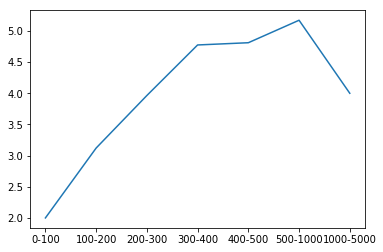

In [149]:
# 1) line plot x axis = ranged price | y axis = accommodate average 

plt.plot(result3.index, result3['accommodates average'])


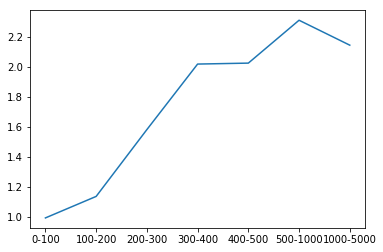

In [150]:
# 2) line plot x axis = ranged price | y axis = bedrooms average 

plt.plot(result3.index, result3['bedrooms average'])

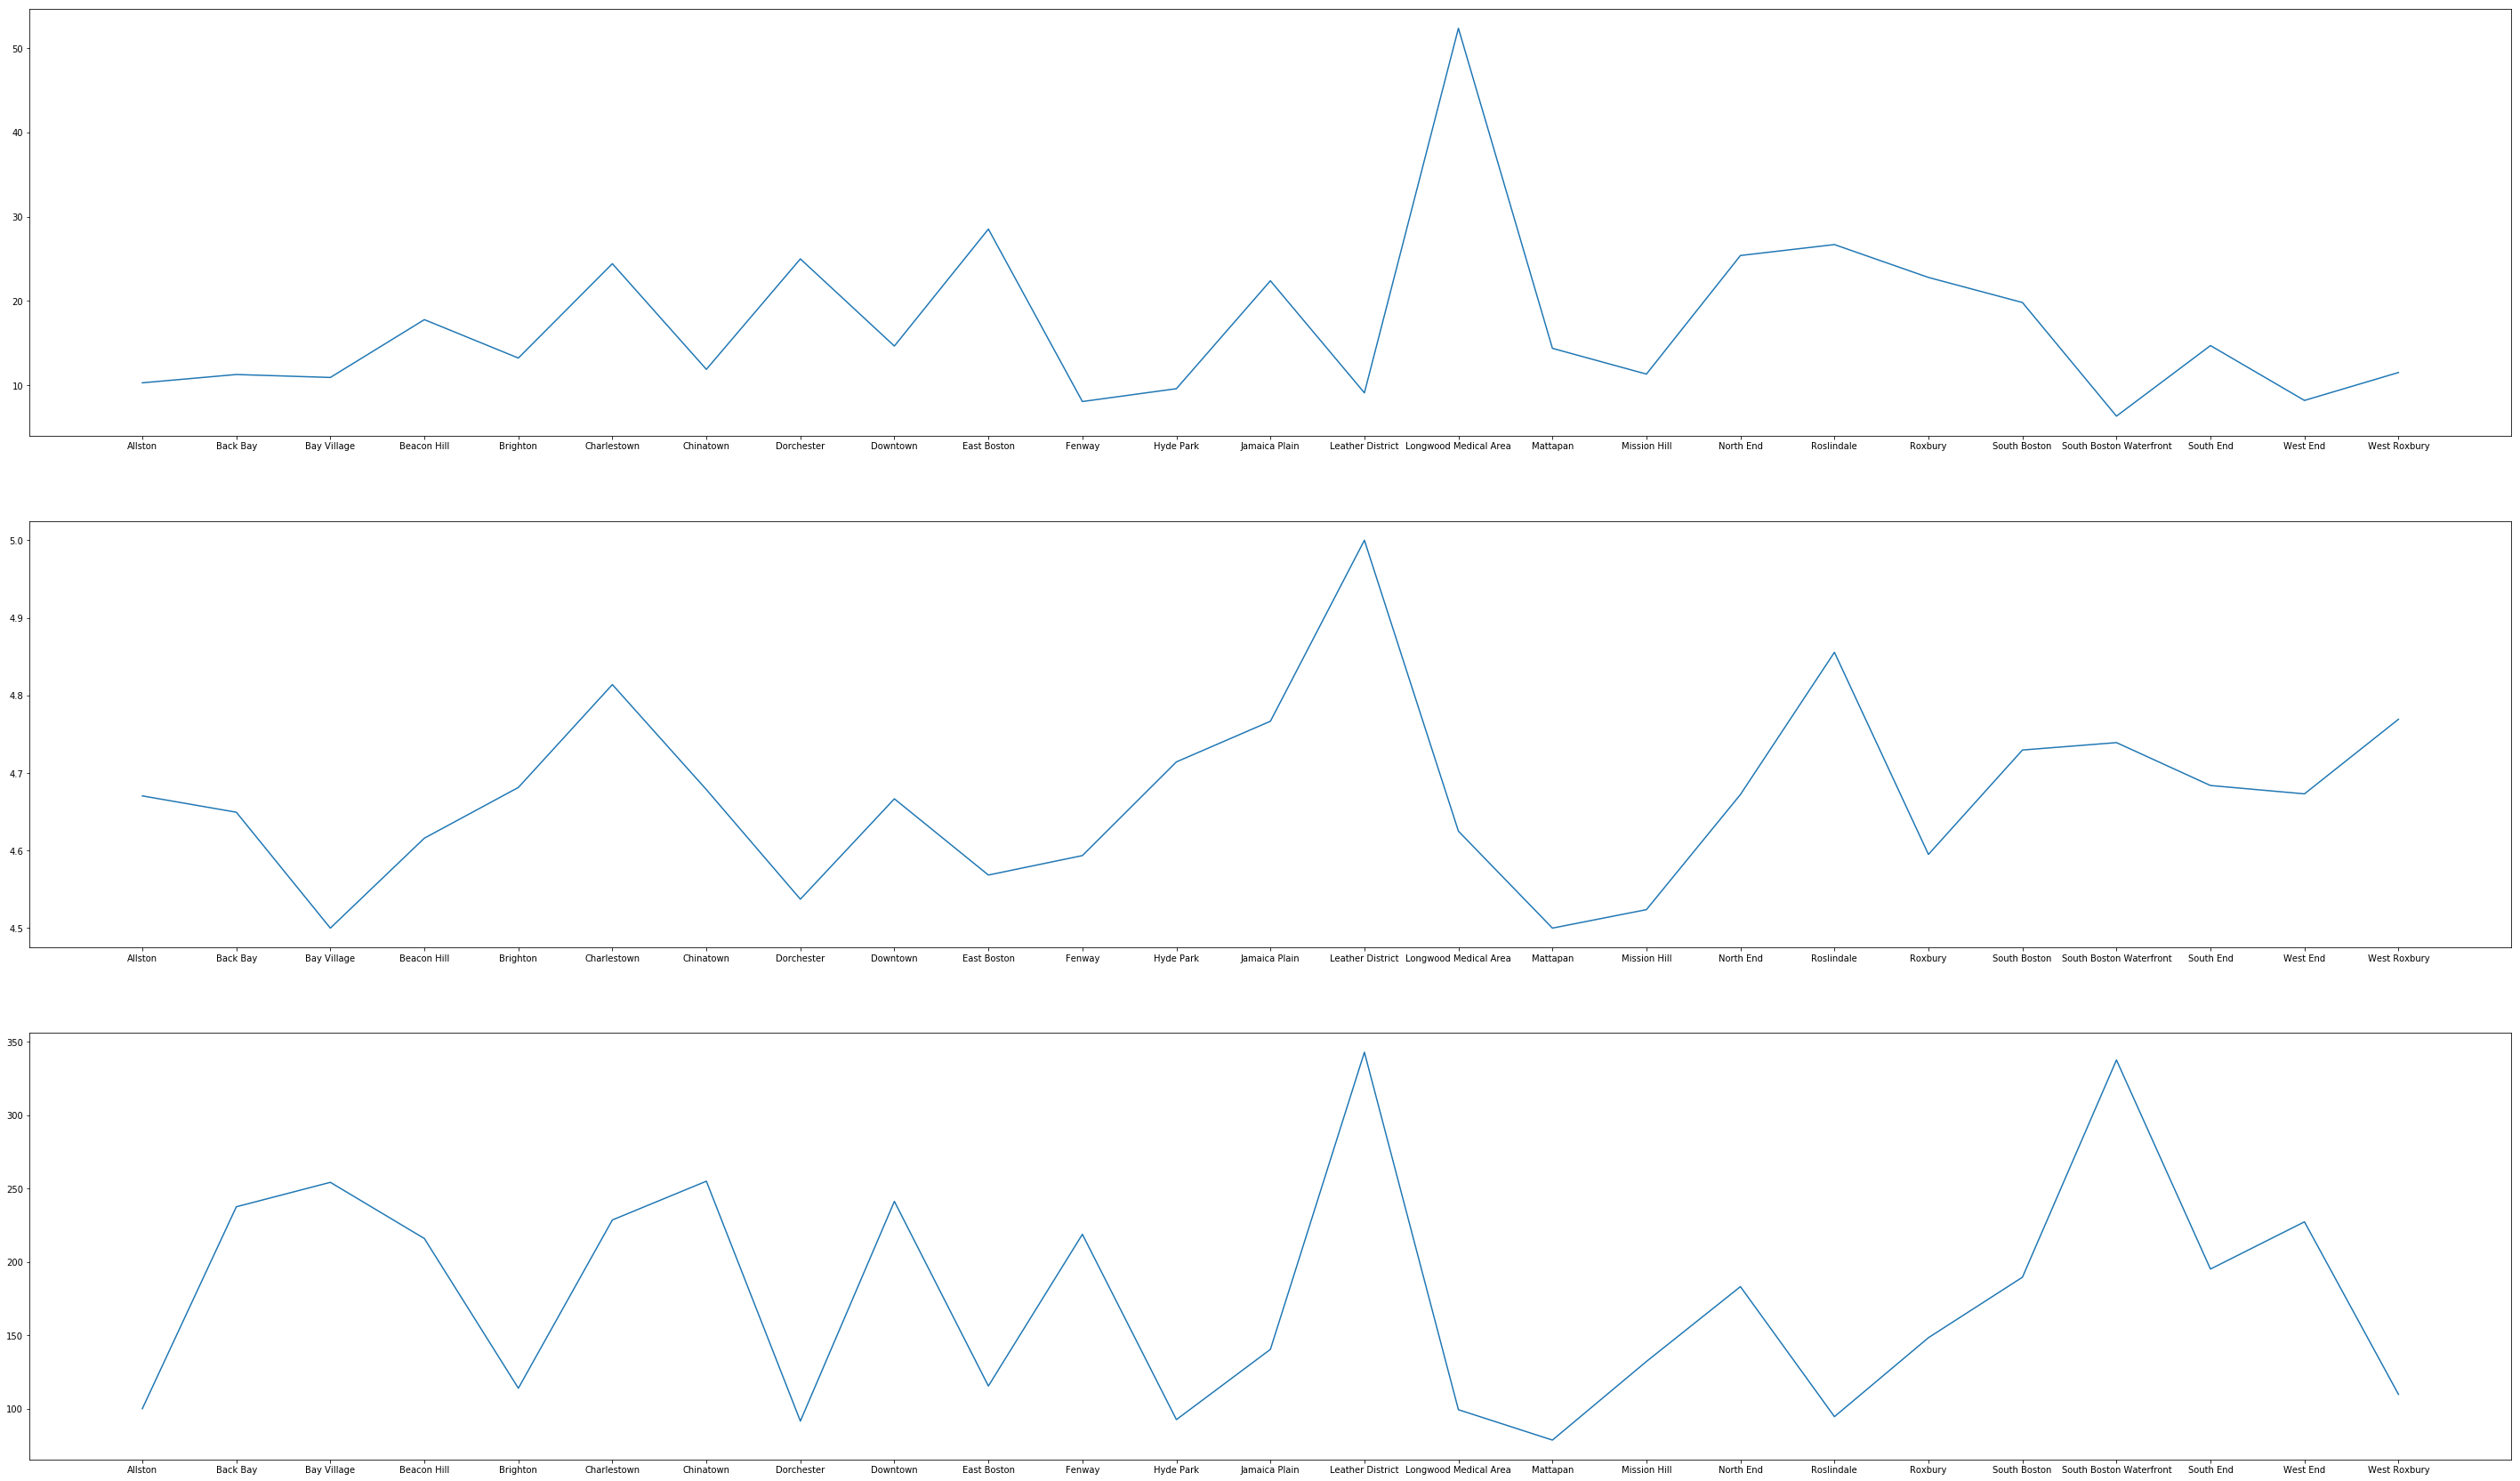

In [177]:
#3) line subplot x axis = neighborhood  
#             | y axis = reviews average 
#             | y axis = overall satisfaction average 
#             | y axis = average price average 
plt.rcParams["figure.figsize"] = (50,30)

plt.subplot(311)
plt.plot(result2.index, avgOfReviews)
plt.subplot(312)
plt.plot(result2.index, avgOfOverAllSatisfaction)
plt.subplot(313)
plt.plot(result2.index, avgOfPrice)